### Problem Statement - 
To predict the fire forest burn area

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('forest_fires.csv')

In [3]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
data.shape

(517, 13)

In [5]:
data.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [7]:
data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [8]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [9]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [10]:
data.duplicated().sum()

4

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(513, 13)

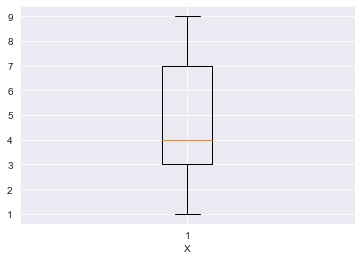

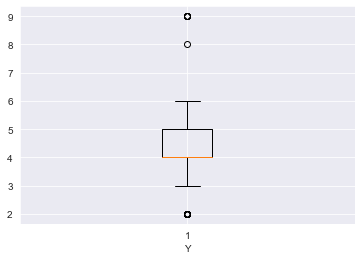

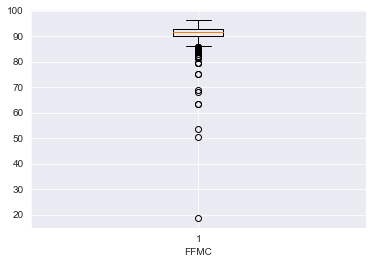

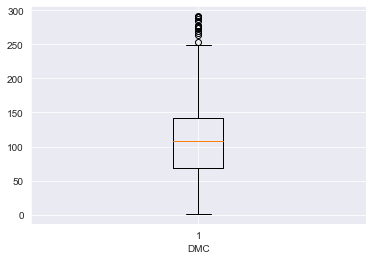

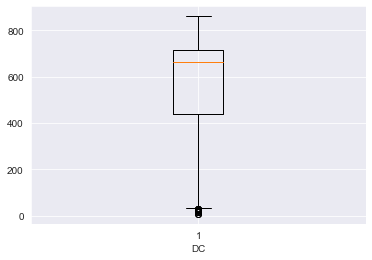

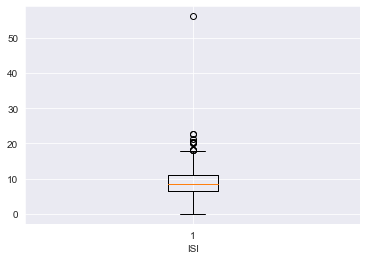

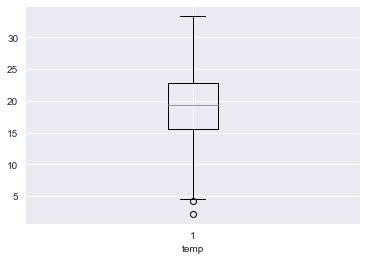

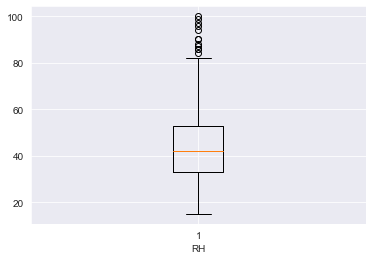

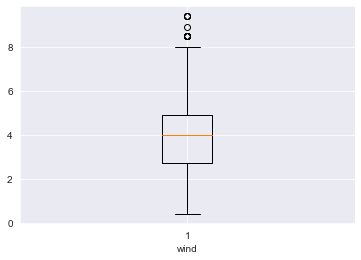

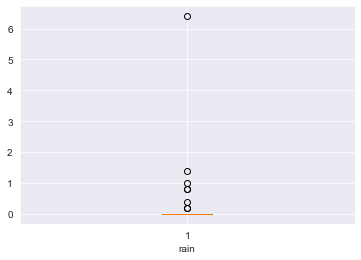

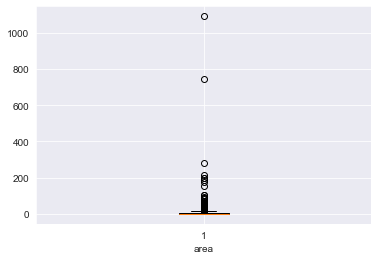

In [13]:
for i in data.select_dtypes(include=['float64','int64']):
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000280C8ED6D48>,
      dtype=object)

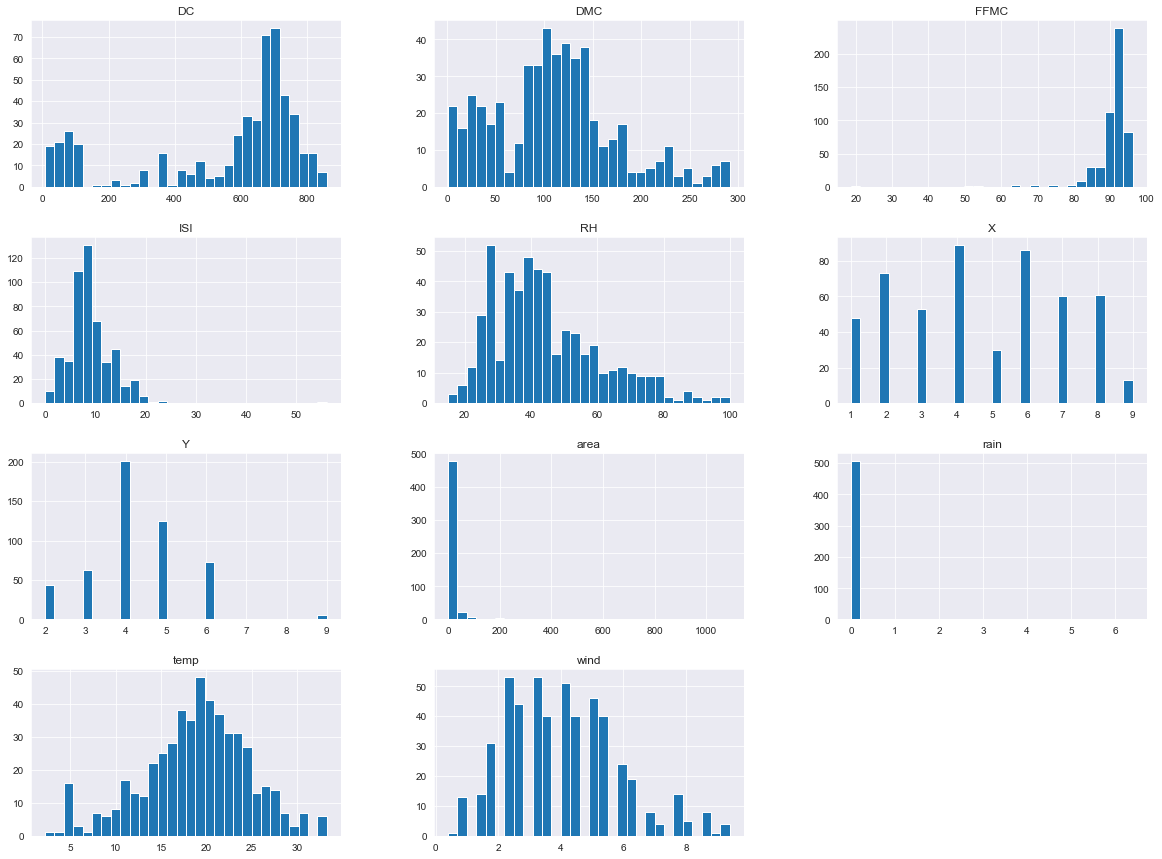

In [14]:
data.hist(bins=30, figsize=(20,15))

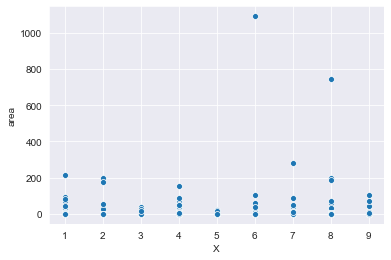

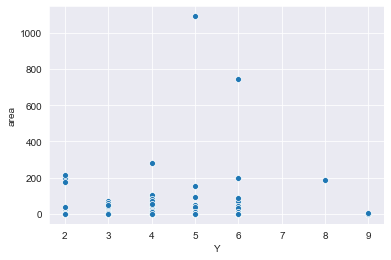

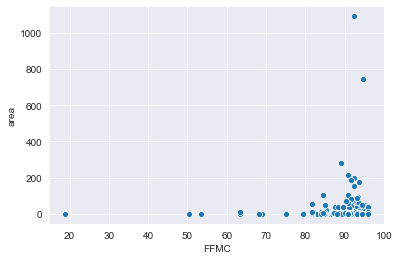

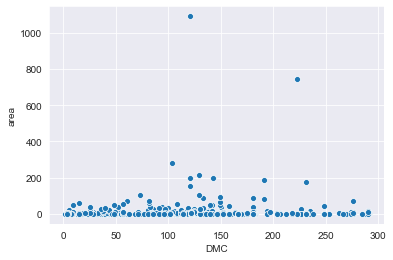

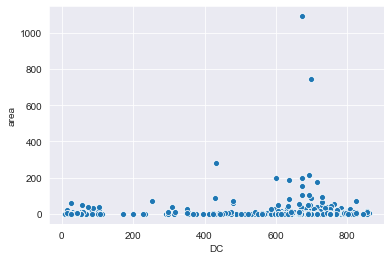

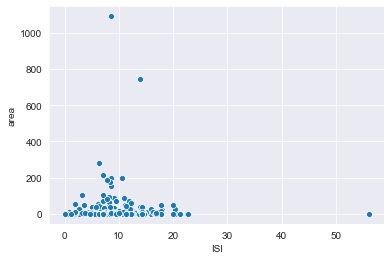

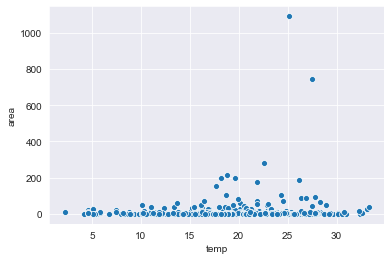

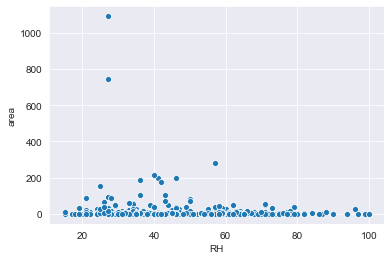

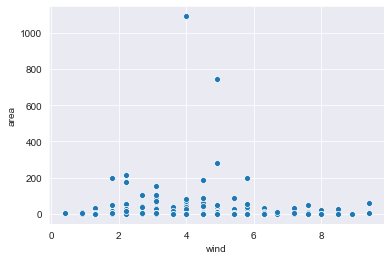

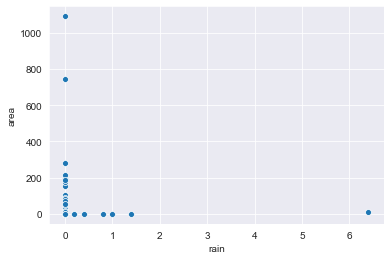

In [15]:
for i in data.select_dtypes(include=('float64','int64')).drop('area',axis = 1):
    sns.scatterplot(data[i],data['area'])
    plt.xlabel(i)
    plt.ylabel('area')
    plt.show()
    

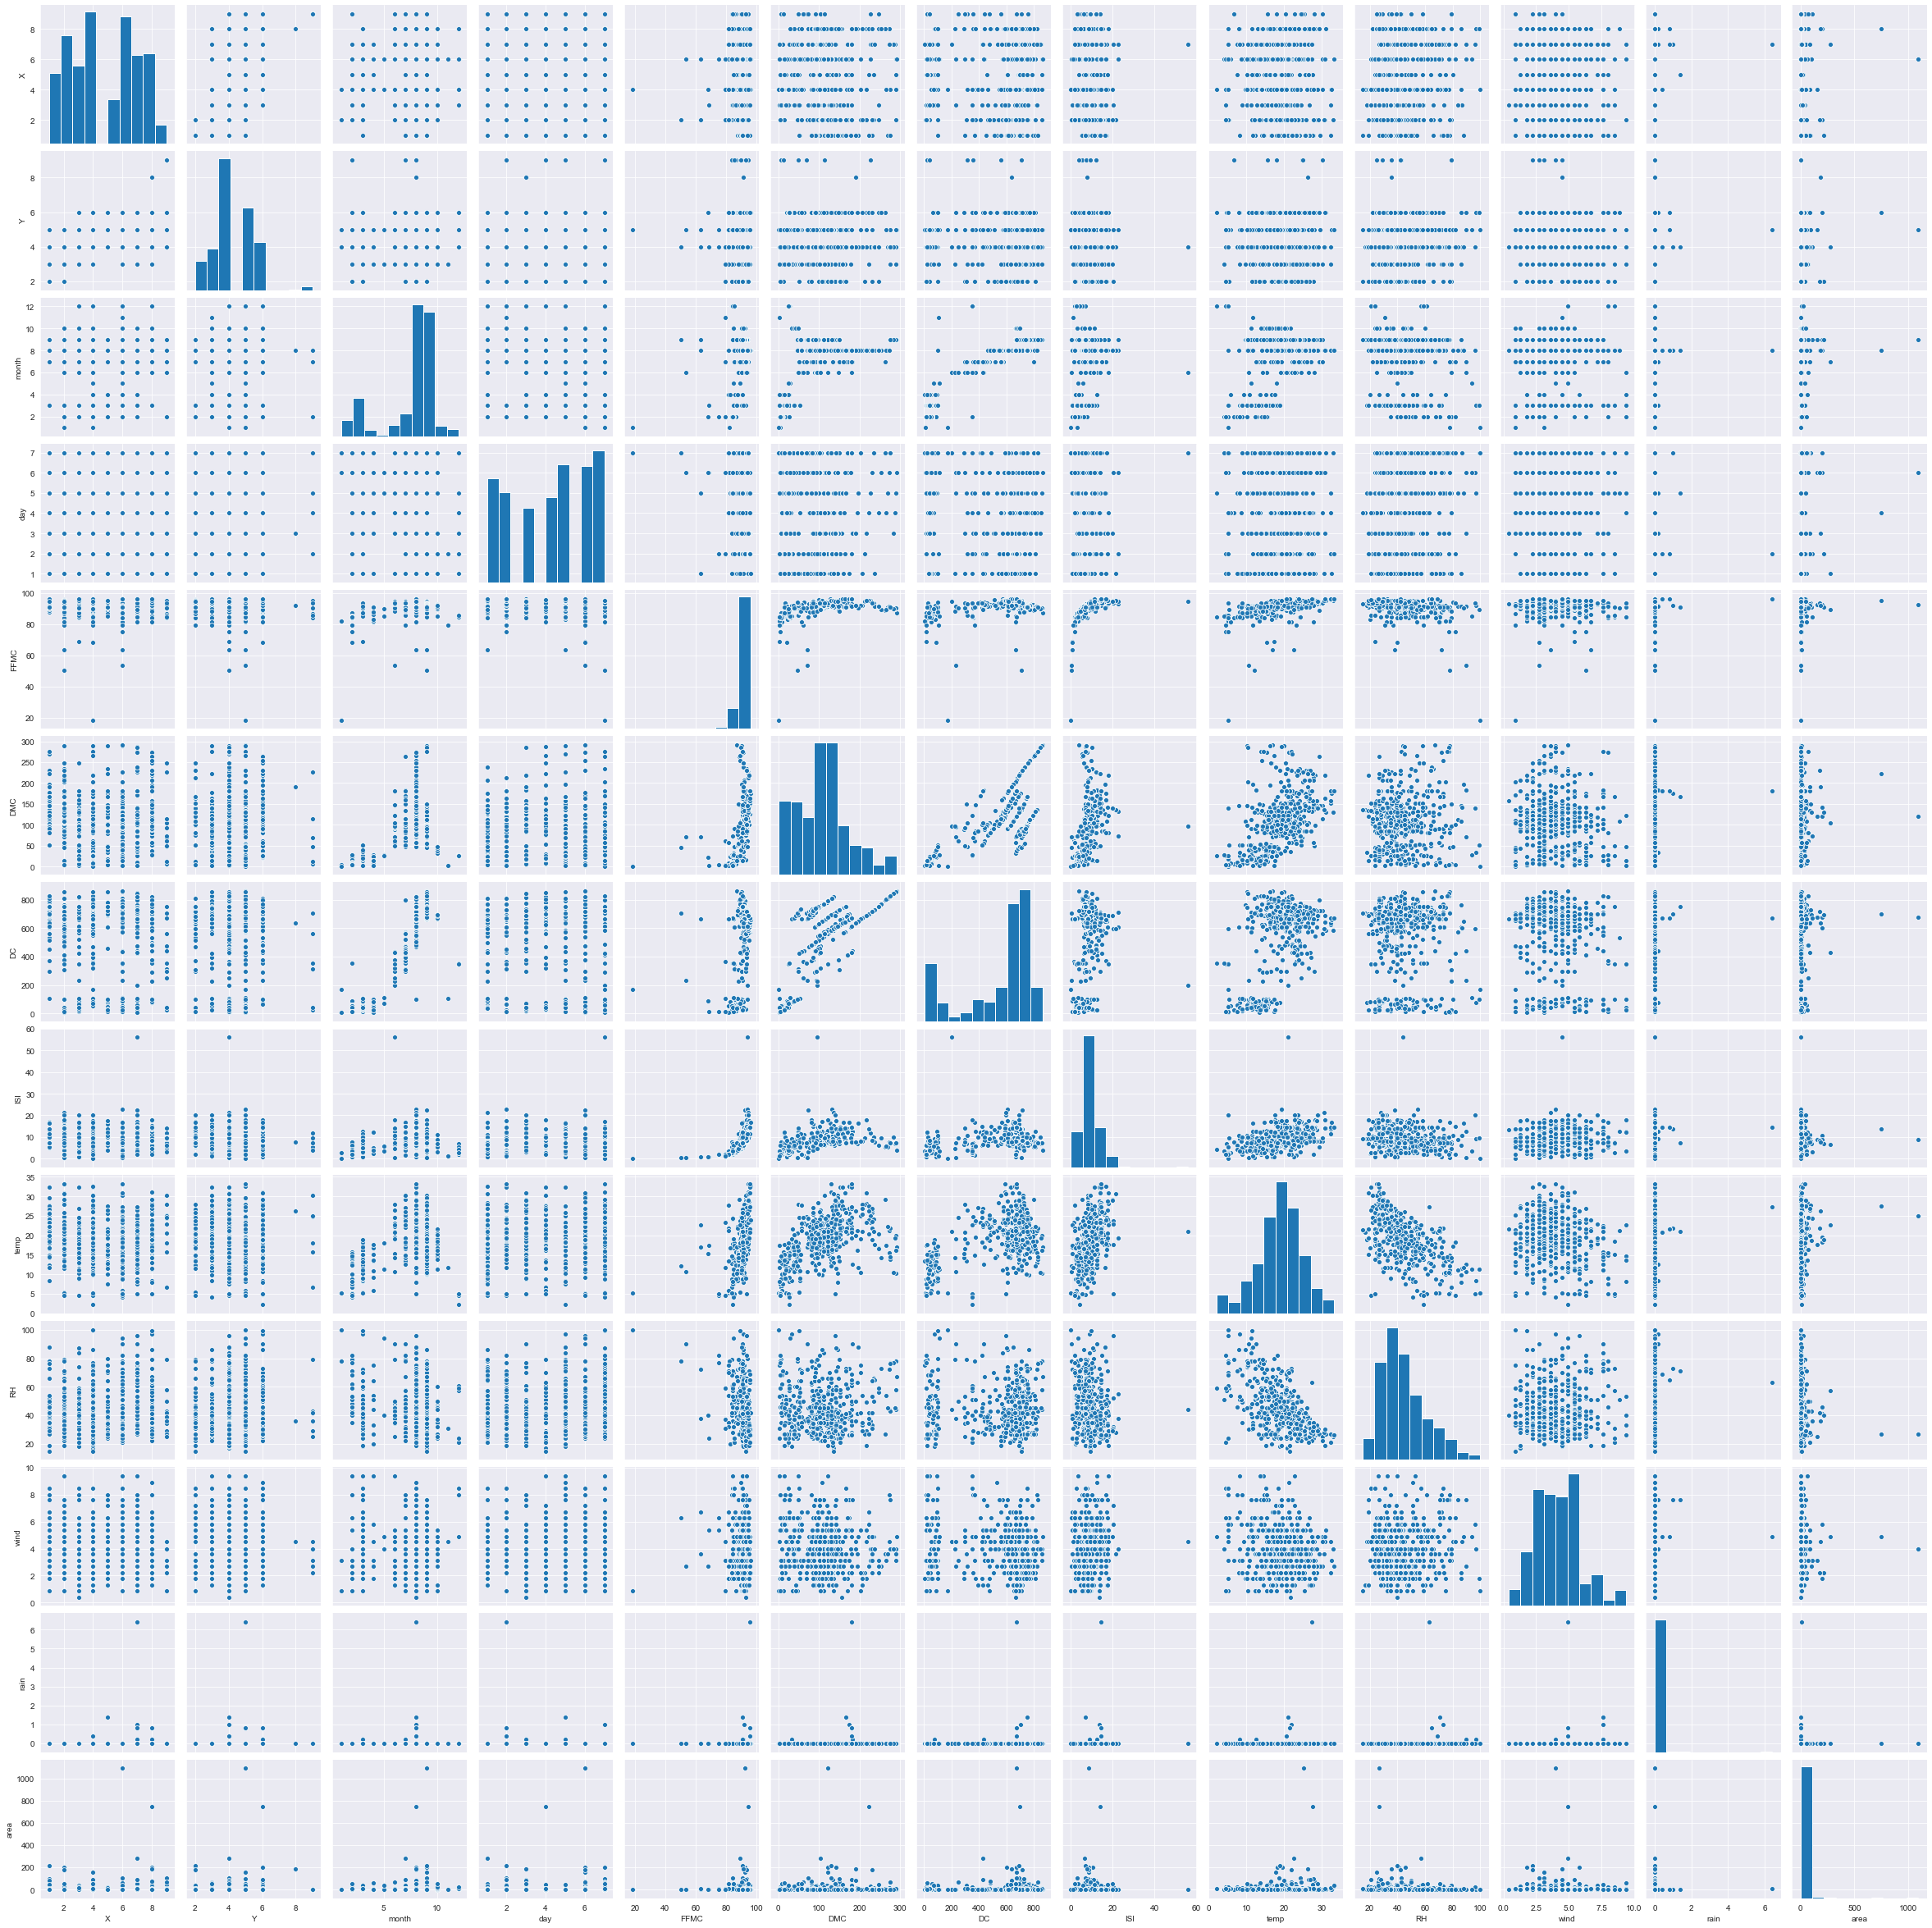

In [40]:
sns.pairplot(data)

In [16]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [17]:
# Coverting the days and months into the integers
data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [18]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [19]:
data.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.542705,-0.066942,-0.022520,-0.020499,-0.048861,-0.088801,0.006033,-0.051070,0.083757,0.020869,0.065176,0.062930
Y,0.542705,1.000000,-0.065383,-0.006672,-0.045979,0.008210,-0.098496,-0.023142,-0.023871,0.062587,-0.019537,0.033313,0.045168
month,-0.066942,-0.065383,1.000000,-0.047832,0.293428,0.464361,0.867865,0.185696,0.369134,-0.100175,-0.085160,0.013187,0.057623
day,-0.022520,-0.006672,-0.047832,1.000000,-0.041606,0.063999,0.004054,0.033008,0.052748,0.095224,0.030199,-0.048206,0.023315
FFMC,-0.020499,-0.045979,0.293428,-0.041606,1.000000,0.383641,0.332936,0.532083,0.431609,-0.300827,-0.029208,0.056806,0.040232
DMC,-0.048861,0.008210,0.464361,0.063999,0.383641,1.000000,0.681741,0.304585,0.469590,0.071711,-0.105111,0.074780,0.073783
DC,-0.088801,-0.098496,0.867865,0.004054,0.332936,0.681741,1.000000,0.228168,0.497584,-0.044067,-0.203010,0.035690,0.050313
ISI,0.006033,-0.023142,0.185696,0.033008,0.532083,0.304585,0.228168,1.000000,0.394217,-0.133363,0.106825,0.067664,0.008411
temp,-0.051070,-0.023871,0.369134,0.052748,0.431609,0.469590,0.497584,0.394217,1.000000,-0.528670,-0.227618,0.069526,0.098222
RH,0.083757,0.062587,-0.100175,0.095224,-0.300827,0.071711,-0.044067,-0.133363,-0.528670,1.000000,0.071433,0.099616,-0.075460


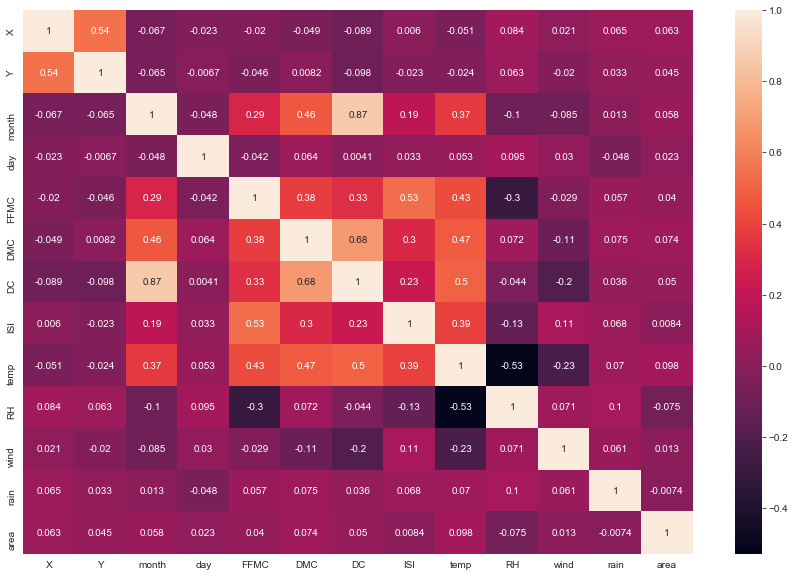

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [21]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [24]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
ss = StandardScaler()
s = data.drop(['month','day'],axis = 1)
data_num = pd.DataFrame(ss.fit_transform(s),columns=s.columns)


In [25]:
le  = LabelEncoder()
data_num['month_le'] = le.fit_transform(data['month'])
data_num['day_le'] = le.fit_transform(data['day'])

In [26]:
data_num.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_le,day_le
0,1.001657,0.569075,-0.801628,-1.322179,-1.837925,-0.858350,-1.835573,0.406971,1.498430,-0.073555,-0.201967,2,4
1,1.001657,-0.244116,-0.006761,-1.178717,0.484659,-0.508323,-0.152432,-0.694428,-1.733018,-0.073555,-0.201967,9,1
2,1.001657,-0.244116,-0.006761,-1.049290,0.556583,-0.508323,-0.736379,-0.694428,-1.510159,-0.073555,-0.201967,9,5
3,1.433101,1.382265,0.191956,-1.211464,-1.905808,-0.005160,-1.818399,3.221658,-0.005865,0.600261,-0.201967,2,4
4,1.433101,1.382265,-0.241608,-0.930777,-1.806003,0.126100,-1.285976,3.344035,-1.231586,-0.073555,-0.201967,2,6


In [27]:
x = data_num.iloc[:,:]
x.shape

(513, 13)

In [28]:
y = data[['area']]
y.shape

(513, 1)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [30]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((359, 13), (154, 13), (359, 1), (154, 1))

### Feature Selection

In [31]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [32]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [33]:
model.fit(X_train,Y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [34]:
model.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False])

In [35]:
selected_features=X_train.columns[(model.get_support())]
selected_features

Index(['area'], dtype='object')

In [36]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [37]:
#Prepare a Linear Regression Model
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,Y_train)

pred_train=reg.predict(X_train)
pred_test=reg.predict(X_test)

from sklearn.metrics import r2_score

print('Train:',r2_score(Y_train,pred_train))
print('Test:',r2_score(Y_test,pred_test))

Train: 1.0
Test: 1.0


In [38]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

pred_train  =  RF.predict(X_train)
pred_test   =  RF.predict(X_test)


from sklearn.metrics import r2_score

print('Train:',r2_score(Y_train,pred_train))
print('Test:',r2_score(Y_test,pred_test))

C:\Users\CHALLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Train: 0.9786569397534451
Test: 0.9319420685402184


In [39]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

DTree=DecisionTreeRegressor()
DTree.fit(X_train,Y_train)

pred_train = DTree.predict(X_train)
pred_test  = DTree.predict(X_test)

from sklearn.metrics import r2_score

print('Train:',r2_score(Y_train,pred_train))
print('Test:',r2_score(Y_test,pred_test))

Train: 1.0
Test: 0.9639772810133689
